<a href="https://colab.research.google.com/github/KaiqueConstantino/Calculating-Learning-Assessment-Metrics-/blob/main/C%C3%A1lculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating Learning Assessment Metrics :

***ING*** : This project demonstrates the implementation of key metrics for evaluating classification models, such as Accuracy, Recall (Sensitivity), Specificity, Precision, and F-Score. These metrics are crucial to understand how well a model performs in distinguishing between classes and to identify areas for improvement. By analyzing the confusion matrix and calculating these metrics, we gain deeper insights into the strengths and weaknesses of our model, enabling better decisions for optimization and real-world application.


**PT-BR** : Este projeto demonstra a implementação das principais métricas para avaliar modelos de classificação, como Acurácia, Recall (Sensibilidade), Especificidade, Precisão e F-Score. Essas métricas são fundamentais para entender o desempenho de um modelo na distinção entre classes e para identificar áreas de melhoria. Ao analisar a matriz de confusão e calcular essas métricas, obtemos uma visão mais profunda sobre os pontos fortes e fracos do modelo, permitindo decisões melhores para otimização e aplicação no mundo real


# Evaluate Metrics Function

***ING*** : This function calculates classification metrics such as Accuracy, Recall (Sensitivity), Specificity, Precision, and F-Score based on the components of a confusion matrix (True Positives, True Negatives, False Positives, False Negatives). Each metric provides unique insights into the model's performance, making it possible to evaluate strengths and weaknesses effectively.


**PT-BR** : Esta função calcula métricas de classificação, como Acurácia, Recall (Sensibilidade), Especificidade, Precisão e F-Score, com base nos componentes de uma matriz de confusão (Verdadeiros Positivos, Verdadeiros Negativos, Falsos Positivos, Falsos Negativos). Cada métrica fornece insights únicos sobre o desempenho do modelo, tornando possível avaliar os pontos fortes e fracos de forma eficaz.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the confusion matrix components
def evaluate_metrics(vp, vn, fp, fn):
    """
    Calculate classification metrics: Accuracy, Recall, Specificity, Precision, and F-Score.

    Parameters:
        vp (int): True Positives
        vn (int): True Negatives
        fp (int): False Positives
        fn (int): False Negatives

    Returns:
        dict: Dictionary with calculated metrics.
    """
    # Accuracy
    accuracy = (vp + vn) / (vp + vn + fp + fn)

    # Sensitivity (Recall)
    recall = vp / (vp + fn) if (vp + fn) != 0 else 0

    # Specificity
    specificity = vn / (vn + fp) if (vn + fp) != 0 else 0

    # Precision
    precision = vp / (vp + fp) if (vp + fp) != 0 else 0

    # F-Score
    f_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Return the metrics as a dictionary
    return {
        "Accuracy": round(accuracy, 4),
        "Recall (Sensitivity)": round(recall, 4),
        "Specificity": round(specificity, 4),
        "Precision": round(precision, 4),
        "F-Score": round(f_score, 4)
    }




# Confusion Matrix Plot Function

***ING*** : This function generates a heatmap to visually represent the confusion matrix. It uses color intensity to indicate the magnitude of each component and provides labels for better interpretation. This visualization makes it easier to understand the distribution of predictions and actual classifications, aiding in model evaluation.


**PT-BR** : Esta função gera um heatmap para representar visualmente a matriz de confusão. Ela utiliza a intensidade das cores para indicar a magnitude de cada componente e fornece rótulos para melhor interpretação. Essa visualização facilita o entendimento da distribuição de previsões e classificações reais, auxiliando na avaliação do modelo.

Classification Metrics:
Accuracy: 0.7826
Recall (Sensitivity): 0.7692
Specificity: 0.8
Precision: 0.8333
F-Score: 0.8


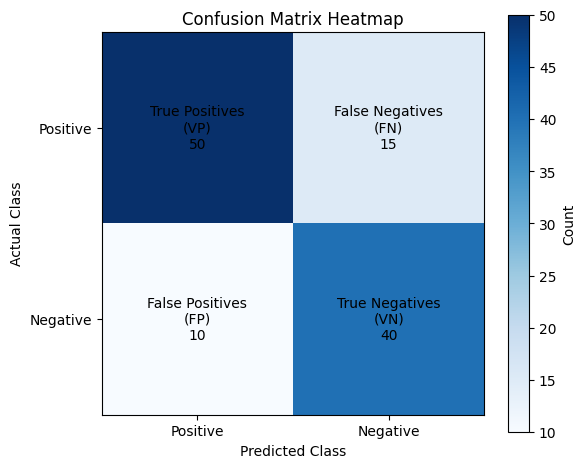

In [7]:
def plot_confusion_matrix(vp, vn, fp, fn):
    """
    Plot a heatmap for the confusion matrix.

    Parameters:
        vp (int): True Positives
        vn (int): True Negatives
        fp (int): False Positives
        fn (int): False Negatives
    """
    # Create the confusion matrix
    matrix = np.array([[vp, fn], [fp, vn]])

    # Define the labels
    labels = [["True Positives\n(VP)", "False Negatives\n(FN)"],
              ["False Positives\n(FP)", "True Negatives\n(VN)"]]

    # Plot the heatmap
    plt.figure(figsize=(6, 5))
    plt.imshow(matrix, cmap="Blues", interpolation="nearest")
    plt.colorbar(label="Count")
    plt.title("Confusion Matrix Heatmap")

    # Add text annotations
    for i in range(2):
        for j in range(2):
            plt.text(j, i, f"{labels[i][j]}\n{matrix[i, j]}", ha="center", va="center", color="black")

    # Set axis labels
    plt.xticks([0, 1], ["Positive", "Negative"])
    plt.yticks([0, 1], ["Positive", "Negative"])
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example of a confusion matrix
vp, vn, fp, fn = 50, 40, 10, 15  # Arbitrary values for testing

# Calculate metrics
metrics = evaluate_metrics(vp, vn, fp, fn)

# Print results
print("Classification Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

# Plot the confusion matrix
plot_confusion_matrix(vp, vn, fp, fn)